<a href="https://colab.research.google.com/github/TechNilsHahn/mslearn-tailspin-spacegame-web/blob/main/SAF_Data_Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [3]:
df_population = pd.read_csv(
    '/content/Bevoelkerung_ab_2011.csv',
    sep=';',
    skiprows=8,
    skipfooter=4,
    encoding='latin',
    names=[
        'Bevoelkerung',
        'Insgesamt_Maennlich',
        'Insgesamt_Weiblich',
        'Insgesamt_Deutsche',
        'Insgesamt_Maennlich_Deutsche',
        'Insgesamt_Weiblich_Deutsche',
        'Insgesamt_Auslaender',
        'Insgesamt_Maennlich_Auslaender',
        'Insgesamt_Weiblich_Auslaender'
        ]).reset_index().rename(columns={
            'level_0': 'Jahr',
            'level_1': 'Gemeinde_Code',
            'level_2': 'Kreise_und_kreisfreie_Staedte',
            'level_3': 'Altersgruppe'})

df_population = df_population[df_population['Altersgruppe']=='Insgesamt'][[
    'Jahr',
    'Gemeinde_Code',
    'Kreise_und_kreisfreie_Staedte',
    'Bevoelkerung']]

df_population['Jahr'] = df_population['Jahr'].astype(str).str.slice(start=-4)
df_population['Jahr'] = pd.to_numeric(df_population['Jahr'])
df_population['Bevoelkerung'] = pd.to_numeric(df_population['Bevoelkerung'], errors='coerce')


df_employed_social_security_contributors = pd.read_csv(
    '/content/Sozialversicherungspflichtige_ab_2011.csv',
    sep=';',
    skiprows=10,
    skipfooter=4,
    encoding='latin',
    names=[
    'Jahr',
    'Gemeinde_Code',
    'Kreise_und_kreisfreie_Staedte',
    'Altersgruppe',
    'Sozialversicherungspflichtig',
    'Insgesamt_Maennlich',
    'Insgesamt_Weiblich',
    'Auslaender_Insgesamt',
    'Auslaender_Maennlich',
    'Auslaender_Weiblich'])

df_employed_social_security_contributors = df_employed_social_security_contributors[df_employed_social_security_contributors['Altersgruppe']=='Insgesamt'][[
    'Jahr',
    'Gemeinde_Code',
    'Kreise_und_kreisfreie_Staedte',
    'Sozialversicherungspflichtig']]

df_employed_social_security_contributors['Jahr'] = df_employed_social_security_contributors['Jahr'].astype(str).str.slice(start=-4)
df_employed_social_security_contributors['Jahr'] = pd.to_numeric(df_employed_social_security_contributors['Jahr'])
df_employed_social_security_contributors['Sozialversicherungspflichtig'] = pd.to_numeric(df_employed_social_security_contributors['Sozialversicherungspflichtig'], errors='coerce')

df_jobless = pd.read_csv(
    '/content/Arbeitslose_ab_2011.csv',
    sep=';',
    skiprows=9,
    skipfooter=4,
    encoding='latin',
    names=[
        'Jahr',
        'Gemeinde_Code',
        'Kreise_und_kreisfreie_Staedte',
        'Arbeitslose',
        'Arbeitslose_Auslaender',
        'Arbeitslose_Schwerbehindert',
        'Arbeitslose_15_bis_20_Jahre',
        'Arbeitslose_15_bis_25_Jahre',
        'Arbeitslose_55_bis_65_Jahre',
        'Arbeitslose_langzeitarbeitslos'
        ])
df_jobless = df_jobless[[
    'Jahr',
    'Gemeinde_Code',
    'Kreise_und_kreisfreie_Staedte',
    'Arbeitslose']]

df_jobless['Jahr'] = df_jobless['Jahr'].astype(str).str.slice(start=-4)
df_jobless['Jahr'] = pd.to_numeric(df_jobless['Jahr'])
df_jobless['Arbeitslose'] = pd.to_numeric(df_jobless['Arbeitslose'], errors='coerce')

df_deaths = pd.read_csv(
    '/content/Gestorbene_ab_2011.csv',
    sep=';',
    skiprows=6,
    skipfooter=4,
    encoding='latin',
    names=[
        'Jahr',
        'Gemeinde_Code',
        'Kreise_und_kreisfreie_Staedte',
        'Gestorbene'])

df_deaths['Jahr'] = pd.to_numeric(df_deaths['Jahr'])
df_deaths['Gestorbene'] = pd.to_numeric(df_deaths['Gestorbene'], errors='coerce')

df_births = pd.read_csv(
    '/content/Lebendgeborene_ab_2011.csv',
    sep=';',
    skiprows=6,
    skipfooter=4,
    encoding='latin',
    names=[
        'Jahr',
        'Gemeinde_Code',
        'Kreise_und_kreisfreie_Staedte',
        'Geborene'])

df_births['Jahr'] = pd.to_numeric(df_births['Jahr'])
df_births['Geborene'] = pd.to_numeric(df_births['Geborene'], errors='coerce')

df_asylum_seekers = pd.read_csv(
    '/content/Schutzsuchende_ab_2011.csv',
    sep=';',
    skiprows=8,
    skipfooter=4,
    encoding='latin',
    names=[
        'Jahr',
        'Gemeinde_Code',
        'Kreise_und_kreisfreie_Staedte',
        'Schutzsuchende',
        'Offener_Schutzstatus',
        'Anerkannter_Schutzstatus',
        'Befristet_anerkannter_Schutzstatus',
        'Befristet_anerkannter_Schutzstatus_aus_Asylverfahren',
        'Befristet_anerkannter_Schutzstatus_nicht_aus_Asylverfahren',
        'Unbefristet_anerkannter_Schutzstatus',
        'Ohne_Schutzstatus',
        'Geduldet_ausreisepflichtig',
        'Latent_ausreisepflichtig',
        'Vollziehbar_ausreisepflichtig'
        ])
df_asylum_seekers = df_asylum_seekers[[
        'Jahr',
        'Gemeinde_Code',
        'Kreise_und_kreisfreie_Staedte',
        'Schutzsuchende']]

df_asylum_seekers['Jahr'] = df_asylum_seekers['Jahr'].astype(str).str.slice(start=-4)
df_asylum_seekers['Jahr'] = pd.to_numeric(df_asylum_seekers['Jahr'])
df_asylum_seekers['Schutzsuchende'] = pd.to_numeric(df_asylum_seekers['Schutzsuchende'], errors='coerce')


df_immigration_and_emigration = pd.read_csv(
    '/content/Zu_und_Fortzuege_ab_2011.csv',
    sep=';',
    skiprows=6,
    skipfooter=4,
    encoding='latin',
    names=[
        'Jahr',
        'Gemeinde_Code',
        'Kreise_und_kreisfreie_Staedte',
        'Zuzuege',
        'Fortzuege'])

df_immigration_and_emigration['Jahr'] = pd.to_numeric(df_immigration_and_emigration['Jahr'])
df_immigration_and_emigration['Zuzuege'] = pd.to_numeric(df_immigration_and_emigration['Zuzuege'], errors='coerce')
df_immigration_and_emigration['Fortzuege'] = pd.to_numeric(df_immigration_and_emigration['Fortzuege'], errors='coerce')

df_commerce = pd.read_csv(
    '/content/Gewerbe_ab_2011.csv',
    sep=';',
    skiprows=8,
    skipfooter=4,
    encoding='latin',
    names=[
        'Jahr',
        'Gemeinde_Code',
        'Kreise_und_kreisfreie_Staedte',
        'Gewerbeanmeldungen',
        'Gewerbeanmeldungen_Neuerrichtungen',
        'Gewerbeanmeldungen_Betriebsgruendung',
        'Gewerbeanmeldungen_Zuzuege',
        'Gewerbeanmeldungen_Uebernahmen',
        'Gewerbeabmeldungen',
        'Gewerbeabmeldungen_Aufgaben',
        'Gewerbeabmeldungen_Betriebsaufgaben',
        'Gewerbeabmeldungen_Fortzüge',
        'Gewerbeabmeldungen_Übergaben',])
df_commerce = df_commerce[[
        'Jahr',
        'Gemeinde_Code',
        'Kreise_und_kreisfreie_Staedte',
        'Gewerbeanmeldungen',
        'Gewerbeabmeldungen',
]]
df_commerce['Jahr'] = pd.to_numeric(df_commerce['Jahr'])
df_commerce['Gewerbeanmeldungen'] = pd.to_numeric(df_commerce['Gewerbeanmeldungen'], errors='coerce')
df_commerce['Gewerbeabmeldungen'] = pd.to_numeric(df_commerce['Gewerbeabmeldungen'], errors='coerce')

# for df in [df_population, df_employed_social_security_contributors, df_jobless, df_deaths, df_births, df_asylum_seekers, df_immigration_and_emigration, df_commerce]:
#   print(df.head())

df_combined = df_population.merge(df_employed_social_security_contributors, on=['Jahr','Gemeinde_Code','Kreise_und_kreisfreie_Staedte'])
df_combined = df_combined.merge(df_jobless, on=['Jahr','Gemeinde_Code','Kreise_und_kreisfreie_Staedte'])
df_combined = df_combined.merge(df_deaths, on=['Jahr','Gemeinde_Code','Kreise_und_kreisfreie_Staedte'])
df_combined = df_combined.merge(df_births, on=['Jahr','Gemeinde_Code','Kreise_und_kreisfreie_Staedte'])
df_combined = df_combined.merge(df_asylum_seekers, on=['Jahr','Gemeinde_Code','Kreise_und_kreisfreie_Staedte'])
df_combined = df_combined.merge(df_immigration_and_emigration, on=['Jahr','Gemeinde_Code','Kreise_und_kreisfreie_Staedte'])

df_combined = df_combined[~df_combined['Gemeinde_Code'].isin(['DG','01','03','05','06','07','08','09','10','12','13','14','15','16'])]

df_combined = df_combined[~df_combined['Kreise_und_kreisfreie_Staedte'].str.contains('Regierungsbezirk')]
df_combined = df_combined[~df_combined['Kreise_und_kreisfreie_Staedte'].str.contains('Stat. Region')]
df_combined = df_combined[~df_combined['Kreise_und_kreisfreie_Staedte'].str.contains('Region Hannover')]

#df_combined[df_combined['Gemeinde_Code'].str.len()<=5].head(50)
#df_combined[df_combined['Kreise_und_kreisfreie_Staedte'].str.contains('Region')]

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
# df_coordinates = pd.read_excel(
#     '/content/Koordinaten.xlsx',
#     #sep=';',
#     skiprows=5,
#     skipfooter=12,
#     sheet_name='Onlineprodukt_Gemeinden',
#     #encoding='latin',
#     names=['Satzart',
#            'Textkennzeichen',
#            'Gemeinde_Code_Land',
#            'Gemeinde_Code_RB',
#            'Gemeinde_Code_Kreis',
#            'Gemeinde_Code_VB',
#            'Gemeinde_Code_Gem',
#            'Gemeindename',
#            'Flaeche',
#            'Bevoelkerung_Insgesamt',
#            'Bevoelkerung_Maennlich',
#            'Bevoelkerung_Weiblich',
#            'Bevoelkerung_km',
#            'Postleitzahl',
#            'Laengengrad',
#            'Breitengrad',
#            'Reisegebiet_Schluessel',
#            'Reisegebiet_Bezeichnung',
#            'Verstaedterung_Schluessel',
#            'Verstaedterung_Bezeichnung']
#    )


# df_coordinates = df_coordinates.convert_dtypes()

# df_coordinates['Gemeinde_Code_Land'] = df_coordinates['Gemeinde_Code_Land'].astype(str).str.zfill(2) #.str.replace('.00','')
# df_coordinates['Gemeinde_Code_RB'] = df_coordinates['Gemeinde_Code_RB'].astype(str)#.str.replace('.0','')
# df_coordinates['Gemeinde_Code_Kreis'] = df_coordinates['Gemeinde_Code_Kreis'].astype(str).str.zfill(2)

# df_coordinates['Gemeinde_Code'] = df_coordinates['Gemeinde_Code_Land'] + df_coordinates['Gemeinde_Code_RB'] + df_coordinates['Gemeinde_Code_Kreis']

# df_coordinates = df_coordinates[['Gemeinde_Code','Laengengrad','Breitengrad']].dropna()
# df_coordinates['Laengengrad'] = pd.to_numeric(df_coordinates['Laengengrad'].str.replace(',','.'))
# df_coordinates['Breitengrad'] = pd.to_numeric(df_coordinates['Breitengrad'].str.replace(',','.'))

# df_coordinates = df_coordinates.drop_duplicates(subset='Gemeinde_Code')
# df_combined = df_combined.merge(df_coordinates, how='left', on='Gemeinde_Code')
# df_combined

In [5]:
# town_filter = (
#     (df_combined['Kreise_und_kreisfreie_Staedte'].str.contains('Stadt'))
#     |df_combined['Kreise_und_kreisfreie_Staedte'].isin(['Berlin', 'Hamburg', 'Bremen'])

# )

# rural_filter = (
#     (df_combined['Kreise_und_kreisfreie_Staedte'].str.contains('Landkreis'))
#     |(df_combined['Kreise_und_kreisfreie_Staedte'].str.contains('Kreis'))
# )
# df_towns = df_combined[town_filter]
# df_rural = df_combined[rural_filter]

In [6]:
df = df_combined.copy()
df = df.set_index('Gemeinde_Code')
df_2011 = df[df['Jahr']==2011]
df_2012 = df[df['Jahr']==2012]
df_2013 = df[df['Jahr']==2013]
df_2014 = df[df['Jahr']==2014]
df_2015 = df[df['Jahr']==2015]
df_2016 = df[df['Jahr']==2016]
df_2017 = df[df['Jahr']==2017]
df_2018 = df[df['Jahr']==2018]
df_2019 = df[df['Jahr']==2019]
df_2020 = df[df['Jahr']==2020]

column_list = ['Bevoelkerung',
               'Sozialversicherungspflichtig',
               'Arbeitslose',
               'Gestorbene',
               'Geborene',
               'Schutzsuchende',
               'Zuzuege',
               'Fortzuege']

set_dic = {'2':8,
           '3':7,
           '4':6,
           '5':5,
           '6':4}

set_df_dic = {}
def create_sets(set_key='2', target_column='Bevoelkerung', set_dic=set_dic):
  temp_column_list = column_list.copy()
  temp_column_list.remove(target_column)
  set_df = pd.DataFrame()

  for i in range(1,set_dic[set_key]+1):
      current_set_df = pd.DataFrame()
      set_start_year = 2010 + i

      for column in temp_column_list:

          for j in range(int(set_key)):

              column_name = str(column) +  '_' + str(j-int(set_key))
              current_set_df[column_name] = df[df['Jahr']==set_start_year+j][column]

              current_set_df[target_column] = df[df['Jahr']==set_start_year+int(set_key)][target_column]
              #current_set_df['Laengengrad'] = df[df['Jahr']==set_start_year+int(set_key)]['Laengengrad']
              #current_set_df['Breitengrad'] = df[df['Jahr']==set_start_year+int(set_key)]['Breitengrad']
      set_df=pd.concat([set_df,current_set_df])

  return set_df.reset_index().dropna()
for column in column_list:
  for set_key in set_dic.keys():
    name = column + '_set_size_' + set_key
    set_df_dic[name] = create_sets(set_key=set_key, target_column=column)

set_df_dic.keys()

dict_keys(['Bevoelkerung_set_size_2', 'Bevoelkerung_set_size_3', 'Bevoelkerung_set_size_4', 'Bevoelkerung_set_size_5', 'Bevoelkerung_set_size_6', 'Sozialversicherungspflichtig_set_size_2', 'Sozialversicherungspflichtig_set_size_3', 'Sozialversicherungspflichtig_set_size_4', 'Sozialversicherungspflichtig_set_size_5', 'Sozialversicherungspflichtig_set_size_6', 'Arbeitslose_set_size_2', 'Arbeitslose_set_size_3', 'Arbeitslose_set_size_4', 'Arbeitslose_set_size_5', 'Arbeitslose_set_size_6', 'Gestorbene_set_size_2', 'Gestorbene_set_size_3', 'Gestorbene_set_size_4', 'Gestorbene_set_size_5', 'Gestorbene_set_size_6', 'Geborene_set_size_2', 'Geborene_set_size_3', 'Geborene_set_size_4', 'Geborene_set_size_5', 'Geborene_set_size_6', 'Schutzsuchende_set_size_2', 'Schutzsuchende_set_size_3', 'Schutzsuchende_set_size_4', 'Schutzsuchende_set_size_5', 'Schutzsuchende_set_size_6', 'Zuzuege_set_size_2', 'Zuzuege_set_size_3', 'Zuzuege_set_size_4', 'Zuzuege_set_size_5', 'Zuzuege_set_size_6', 'Fortzuege_set

In [7]:
def create_train_test(df, key_name):
  target_column = key_name[:-11]
  df = df.dropna()
  y = df[target_column]
  X = df.drop([target_column], axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
  print(key_name)
  print('Train: ', y_train.shape, X_train.shape)
  print('Test: ', y_test.shape, X_test.shape, '\n')
  return [X_train, y_train, X_test, y_test]

train_test_dic = {}
for key_name in set_df_dic.keys():
  train_test_dic[key_name] = create_train_test(set_df_dic[key_name], key_name)

train_test_dic['Bevoelkerung_set_size_2']

Bevoelkerung_set_size_2
Train:  (2511,) (2511, 15)
Test:  (628,) (628, 15) 

Bevoelkerung_set_size_3
Train:  (2194,) (2194, 22)
Test:  (549,) (549, 22) 

Bevoelkerung_set_size_4
Train:  (1878,) (1878, 29)
Test:  (470,) (470, 29) 

Bevoelkerung_set_size_5
Train:  (1563,) (1563, 36)
Test:  (391,) (391, 36) 

Bevoelkerung_set_size_6
Train:  (1249,) (1249, 43)
Test:  (313,) (313, 43) 

Sozialversicherungspflichtig_set_size_2
Train:  (2518,) (2518, 15)
Test:  (630,) (630, 15) 

Sozialversicherungspflichtig_set_size_3
Train:  (2201,) (2201, 22)
Test:  (551,) (551, 22) 

Sozialversicherungspflichtig_set_size_4
Train:  (1885,) (1885, 29)
Test:  (472,) (472, 29) 

Sozialversicherungspflichtig_set_size_5
Train:  (1569,) (1569, 36)
Test:  (393,) (393, 36) 

Sozialversicherungspflichtig_set_size_6
Train:  (1254,) (1254, 43)
Test:  (314,) (314, 43) 

Arbeitslose_set_size_2
Train:  (2511,) (2511, 15)
Test:  (628,) (628, 15) 

Arbeitslose_set_size_3
Train:  (2194,) (2194, 22)
Test:  (549,) (549, 22) 

[     Gemeinde_Code  Sozialversicherungspflichtig_-2  \
 3541         06431                        105315.00   
 2181         09163                         23506.00   
 2937         01057                         44513.00   
 1255         09474                         46643.00   
 226          08437                         47211.00   
 ...            ...                              ...   
 3833         14523                         88846.00   
 1293         09775                         66889.00   
 1393         14523                         86665.00   
 1587         06413                         43941.00   
 1055         05166                        102623.00   
 
       Sozialversicherungspflichtig_-1  Arbeitslose_-2  Arbeitslose_-1  \
 3541                        107106.00         5346.00         5077.00   
 2181                         24081.00         1700.00         1619.00   
 2937                         45394.00         3268.00         2928.00   
 1255                         

In [8]:
# XGBoost
n_iter_search = 2

svm_param_dist = {
    "kernel":['linear','poly','rbf','sigmoid','precomputed'],
    "degree":[3,4,5,6,7,8,9],
    "C":[0.01,0.1,0.5,1,1.5,2,4,8],
    'cache_size':[800]
}

svm_reg = SVR()

gb_param_dist = {
    "loss": ['squared_error', 'absolute_error', 'huber', 'quantile'],
    "learning_rate": [0.0001, 0.001,0.01,0.1, 0.2,0.3,0.4,0.5, 0.6, 0.8, 0.9],
    "n_estimators": [1,2,4,8,16,32,64,128,256,512],
    #'subsample': [0,0.25,0.5,0.75,1.0],
    #'criterion': ['friedman_mse', 'squared_error'],
    "min_samples_split": [2,4,8, 16,32,64],
    #"min_samples_leaf": [0.25,0.5,0.75,1.0],
    "max_depth": [1,2,4,8, 16,32,64,128,256,512],
    #'max_features':['auto','sqrt','log2'],

}
gb_reg = GradientBoostingRegressor()

rf_param_dist = {
    "n_estimators": [1,2,4,8,16,32,64,128,256,512], #[
    'criterion':['squared_error','absolute_error','poisson'],
    "max_depth": [1,2,4,8, 16,32,64,128,256,512],
    #"min_samples_split": [2,4,8, 16,32,64],
    #'min_samples_leaf':[2,4,8, 16,32,64],
    #'max_features':['auto','sqrt','log2'],
}
rf_reg = RandomForestRegressor()

reg_param_dic = {
    'SVR': [svm_reg, svm_param_dist],
    'GradientBoostingRegressor': [gb_reg, gb_param_dist],
    'RandomForestRegressor': [rf_reg, rf_param_dist],
}

In [ ]:
def smape(A, F):
    return -1*(100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F))))

smape_score = make_scorer(smape, greater_is_better=False)
mse_score = make_scorer(mean_absolute_error, greater_is_better=False)

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

for reg in reg_param_dic.keys():
  print(reg)
  random_search = RandomizedSearchCV(
      reg_param_dic[reg][0],
      param_distributions=reg_param_dic[reg][1],
      n_iter=n_iter_search,
      scoring=smape_score,#'neg_mean_absolute_error',
      verbose=5
  )
  start = time()
  random_search.fit(train_test_dic['Bevoelkerung_set_size_2'][0], train_test_dic['Bevoelkerung_set_size_2'][1])
  print(
      "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
      % ((time() - start), n_iter_search)
  )
  report(random_search.cv_results_)

SVR
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END C=2, cache_size=800, degree=7, kernel=poly;, score=46.528 total time=   7.3s
[CV 2/5] END C=2, cache_size=800, degree=7, kernel=poly;, score=46.777 total time=   3.9s
[CV 3/5] END C=2, cache_size=800, degree=7, kernel=poly;, score=44.912 total time=   4.0s
[CV 4/5] END C=2, cache_size=800, degree=7, kernel=poly;, score=47.413 total time=   1.7s
[CV 5/5] END C=2, cache_size=800, degree=7, kernel=poly;, score=47.970 total time=   5.1s


In [ ]:
li_reg = LinearRegression()

li_reg.fit(X_train, y_train)
X_train.columns

In [ ]:
params = {
    'n_estimators': 128, 'min_samples_split': 8, 'max_depth': 32, 'loss': 'squared_error', 'learning_rate': 0.5
}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mae = mean_absolute_error(y_test, reg.predict(X_test))
print("The mean squared error (MAE) on test set: {:.4f}".format(mae))



In [193]:
scoring = ['r2',
           'neg_mean_absolute_error',
           'neg_mean_absolute_percentage_error',
           'neg_mean_squared_error',
           'explained_variance',
           'neg_median_absolute_error']
r_multi = permutation_importance(reg, X_test, y_test,
                           n_repeats=30,
                           random_state=0,
                           scoring=scoring)

for metric in r_multi:
     print(f"{metric}")
     r = r_multi[metric]
     for i in r.importances_mean.argsort()[::-1]:
         if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
             print(f"    {X_train.columns[i]:<8}"
                   f" "
                   f"{r.importances_mean[i]:.3f}"
                   f" +/- {r.importances_std[i]:.3f}")


r2
    Gestorbene_-2 0.040 +/- 0.007
    Gestorbene_-5 0.023 +/- 0.004
    Sozialversicherungspflichtig_-3 0.021 +/- 0.003
    Sozialversicherungspflichtig_-5 0.016 +/- 0.002
    Geborene_-1 0.015 +/- 0.001
    Gestorbene_-6 0.013 +/- 0.002
    Gestorbene_-4 0.012 +/- 0.002
    Geborene_-2 0.010 +/- 0.002
    Geborene_-3 0.009 +/- 0.002
    Sozialversicherungspflichtig_-4 0.009 +/- 0.001
    Sozialversicherungspflichtig_-6 0.008 +/- 0.001
    Sozialversicherungspflichtig_-1 0.004 +/- 0.001
    Geborene_-6 0.004 +/- 0.000
    Sozialversicherungspflichtig_-2 0.002 +/- 0.000
    Arbeitslose_-5 0.002 +/- 0.000
    Gestorbene_-3 0.002 +/- 0.000
    Arbeitslose_-1 0.001 +/- 0.000
    Geborene_-4 0.001 +/- 0.000
    Gestorbene_-1 0.001 +/- 0.000
    Arbeitslose_-2 0.001 +/- 0.000
    Fortzuege_-6 0.001 +/- 0.000
    Schutzsuchende_-2 0.001 +/- 0.000
    Zuzuege_-2 0.000 +/- 0.000
    Schutzsuchende_-6 0.000 +/- 0.000
    Zuzuege_-4 0.000 +/- 0.000
    Zuzuege_-3 0.000 +/- 0.000
    Fortzuege_

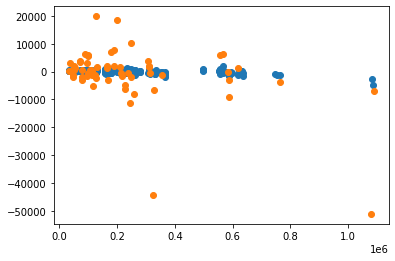

In [196]:
plt.scatter(y_train, reg.predict(X_train)-y_train)
plt.scatter(y_test, reg.predict(X_test)-y_test)

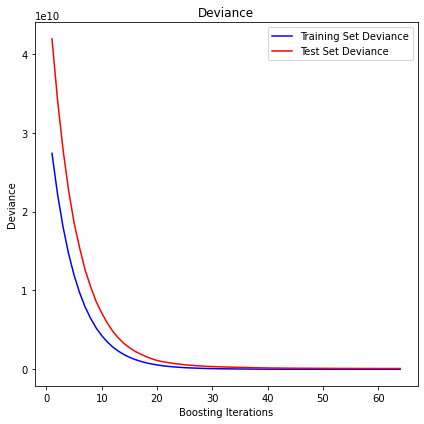

In [197]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

IndexError: ignored

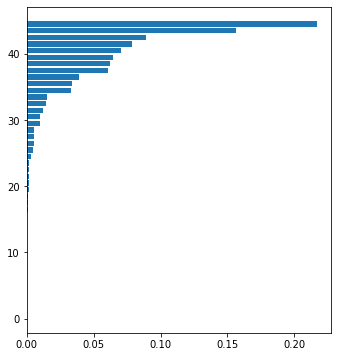

In [198]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_prep.drop(['Bevoelkerung','Gemeinde_Code','Kreise_und_kreisfreie_Staedte'], axis =1).columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_prep.drop(['Bevoelkerung','Gemeinde_Code','Kreise_und_kreisfreie_Staedte'], axis =1).columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


In [ ]:
for year in [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]:
  for code in df_combined['Gemeinde_Code'].unique():
    df_diff_1.loc[(df_diff_1['Jahr']==year)&(df_diff_1['Gemeinde_Code']==code),'Bevoelkerung'] = df_combined.loc[(df_combined['Jahr']==year)&(df_combined['Gemeinde_Code']==code),'Bevoelkerung'].values[0] - df_combined.loc[(df_combined['Jahr']==year-1)&(df_combined['Gemeinde_Code']==code),'Bevoelkerung'].values[0]

df_diff_2 = df_diff_1.copy()
for year in [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]:
  for code in df_combined['Gemeinde_Code'].unique():
    df_diff_2.loc[(
        df_diff_2['Jahr']==year)&(
            df_diff_2['Gemeinde_Code']==code),'Bevoelkerung'] = df_diff_1.loc[(
        df_diff_1['Jahr']==year)&(
            df_diff_1['Gemeinde_Code']==code),'Bevoelkerung'].values[0] - df_diff_1.loc[(
                df_diff_1['Jahr']==year-1)&(
                    df_diff_1['Gemeinde_Code']==code),'Bevoelkerung'].values[0]                

In [ ]:
print(df_combined[(df_combined['Jahr'].isin([2011, 2012, 2013, 2014]))]['Bevoelkerung'].mean())
print(df_combined[(df_combined['Jahr'].isin([2015, 2016]))]['Bevoelkerung'].mean())
print(df_combined[(df_combined['Jahr'].isin([2017, 2018]))]['Bevoelkerung'].mean())
print(df_combined[(df_combined['Jahr'].isin([2019, 2020]))]['Bevoelkerung'].mean())
print()

print(df_diff_1[(df_diff_1['Jahr'].isin([2012, 2013, 2014]))]['Bevoelkerung'].mean())
print(df_diff_1[(df_diff_1['Jahr'].isin([2015, 2016]))]['Bevoelkerung'].mean())
print(df_diff_1[(df_diff_1['Jahr'].isin([2017, 2018]))]['Bevoelkerung'].mean())
print(df_diff_1[(df_diff_1['Jahr'].isin([2019, 2020]))]['Bevoelkerung'].mean())
print()

print(df_diff_2[(df_diff_2['Jahr'].isin([2013, 2014]))]['Bevoelkerung'].mean())
print(df_diff_2[(df_diff_2['Jahr'].isin([2015, 2016]))]['Bevoelkerung'].mean())
print(df_diff_2[(df_diff_2['Jahr'].isin([2017, 2018]))]['Bevoelkerung'].mean())
print(df_diff_2[(df_diff_2['Jahr'].isin([2019, 2020]))]['Bevoelkerung'].mean())
print()


332101.82376126124
340471.4936708861
343188.70967741933
344299.7995391705

1290.6170052671182
2768.0115207373274
1061.115207373272
299.31912442396316

473.109977324263
-205.12557603686636
-206.9434832756632
-512.4516129032259



In [ ]:
df_combined['Timestamp'] = pd.to_datetime(df_combined['Jahr'] , format = '%Y')
df_combined.index = df_combined['Timestamp'] 
df_combined.drop('Jahr',axis = 1, inplace = True)

df_diff_1['Timestamp'] = pd.to_datetime(df_diff_1['Jahr'] , format = '%Y')
df_diff_1.index = df_diff_1['Timestamp'] 
df_diff_1.drop('Jahr',axis = 1, inplace = True)

df_diff_2['Timestamp'] = pd.to_datetime(df_diff_2['Jahr'] , format = '%Y')
df_diff_2.index = df_diff_2['Timestamp'] 
df_diff_2.drop('Jahr',axis = 1, inplace = True)

In [ ]:
df_diff_2[df_diff_2['Gemeinde_Code']=='01002']

,Gemeinde_Code,Kreise_und_kreisfreie_Staedte,Bevoelkerung,Sozialversicherungspflichtig,Arbeitslose,Gestorbene,Geborene,Schutzsuchende,Zuzuege,Fortzuege,Timestamp
Timestamp,,,,,,,,,,,
2011-01-01,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",237667.00,76347.00,13694.00,2318.00,2202.00,2000.00,16620.00,14000.00,2011-01-01
2012-01-01,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",2199.00,78691.00,12732.00,2421.00,2243.00,2195.00,16615.00,14231.00,2012-01-01
2013-01-01,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",-532.00,80005.00,13070.00,2483.00,2255.00,2430.00,16354.00,14555.00,2013-01-01
2014-01-01,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",-52.00,81444.00,13109.00,2437.00,2356.00,3145.00,16939.00,15440.00,2014-01-01
2015-01-01,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",1543.00,83336.00,13022.00,2443.00,2492.00,4535.00,19412.00,16419.00,2015-01-01
2016-01-01,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",-2023.00,86642.00,12867.00,2584.00,2592.00,6200.00,19395.00,18171.00,2016-01-01
2017-01-01,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",-633.00,88428.00,12345.00,2481.00,2508.00,7335.00,15747.00,15360.00,2017-01-01
2018-01-01,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",-897.00,90376.00,11331.00,2584.00,2480.00,7990.00,15855.00,15673.00,2018-01-01
2019-01-01,01002,"Kiel, Landeshauptstadt, kreisfreie Stadt",-359.00,91908.00,10556.00,2577.00,2464.00,8450.00,14635.00,15355.00,2019-01-01


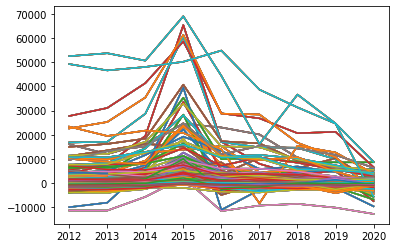

In [ ]:
df_diff_1 = df_diff_1[df_diff_1['Timestamp']>pd.to_datetime(2011 , format = '%Y')]
for gc in df_diff_1['Gemeinde_Code']:
  plt.plot(df_diff_1.loc[df_diff_1['Gemeinde_Code']==gc,'Timestamp'],df_diff_1.loc[df_diff_1['Gemeinde_Code']==gc,'Bevoelkerung'])

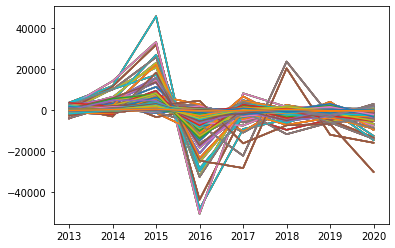

In [ ]:
df_diff_2 = df_diff_2[df_diff_2['Timestamp']>pd.to_datetime(2012 , format = '%Y')]
for gc in df_diff_2['Gemeinde_Code']:
  plt.plot(df_diff_2.loc[df_diff_2['Gemeinde_Code']==gc,'Timestamp'],df_diff_2.loc[df_diff_2['Gemeinde_Code']==gc,'Bevoelkerung'])

In [ ]:
Kiel = df_combined[df_combined['Gemeinde_Code']=='01002']
Kiel_diff_1 = df_diff_1[(df_diff_1['Gemeinde_Code']=='01002')&(df_diff_1['Timestamp']>pd.to_datetime(2016 , format = '%Y'))]
Kiel_diff_2 = df_diff_2[(df_diff_2['Gemeinde_Code']=='01002')&(df_diff_2['Timestamp']>pd.to_datetime(2016 , format = '%Y'))]

Luebeck = df_combined[df_combined['Gemeinde_Code']=='01003']
Luebeck_diff_1 = df_diff_1[(df_diff_1['Gemeinde_Code']=='01003')&(df_diff_1['Timestamp']>pd.to_datetime(2016 , format = '%Y'))]
Luebeck_diff_2 = df_diff_2[(df_diff_2['Gemeinde_Code']=='01003')&(df_diff_2['Timestamp']>pd.to_datetime(2016 , format = '%Y'))]

# Luebeck = df_combined[df_combined['Gemeinde_Code']=='01003']
# Luebeck_stat = df_stationary[(df_stationary['Gemeinde_Code']=='01003')&(df_combined['Timestamp']>pd.to_datetime(2011 , format = '%Y'))]

# Neumuenster = df_combined[df_combined['Gemeinde_Code']=='01004']
# Neumuenster_stat = df_stationary[(df_stationary['Gemeinde_Code']=='01004')&(df_combined['Timestamp']>pd.to_datetime(2011 , format = '%Y'))]

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

#apply adf test on the series
print('Kiel')
adf_test(Kiel['Bevoelkerung'])
adf_test(Kiel_diff_1['Bevoelkerung'])
adf_test(Kiel_diff_2['Bevoelkerung'])
print()
print('Luebeck')
adf_test(Luebeck['Bevoelkerung'])
adf_test(Luebeck_diff_1['Bevoelkerung'])
adf_test(Luebeck_diff_2['Bevoelkerung'])
# print('Neumuenster')

# adf_test(Neumuenster['Bevoelkerung'])
# adf_test(Neumuenster_stat['Bevoelkerung'])

Kiel
Results of Dickey-Fuller Test:
Test Statistic                -2.07
p-value                        0.26
#Lags Used                     2.00
Number of Observations Used    7.00
Critical Value (1%)           -4.94
Critical Value (5%)           -3.48
Critical Value (10%)          -2.84
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -2.42
p-value                         0.14
#Lags Used                      0.00
Number of Observations Used     3.00
Critical Value (1%)           -10.42
Critical Value (5%)            -5.78
Critical Value (10%)           -3.39
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  0.35
p-value                         0.98
#Lags Used                      0.00
Number of Observations Used     3.00
Critical Value (1%)           -10.42
Critical Value (5%)            -5.78
Critical Value (10%)           -3.39
dtype: float64

Luebeck
Results of Dickey-Fuller Test:
Test Statistic                -4.98
p-value    

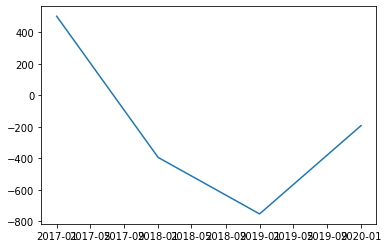

In [ ]:
plt.plot(Kiel_diff_1['Timestamp'], Kiel_diff_1['Bevoelkerung'])

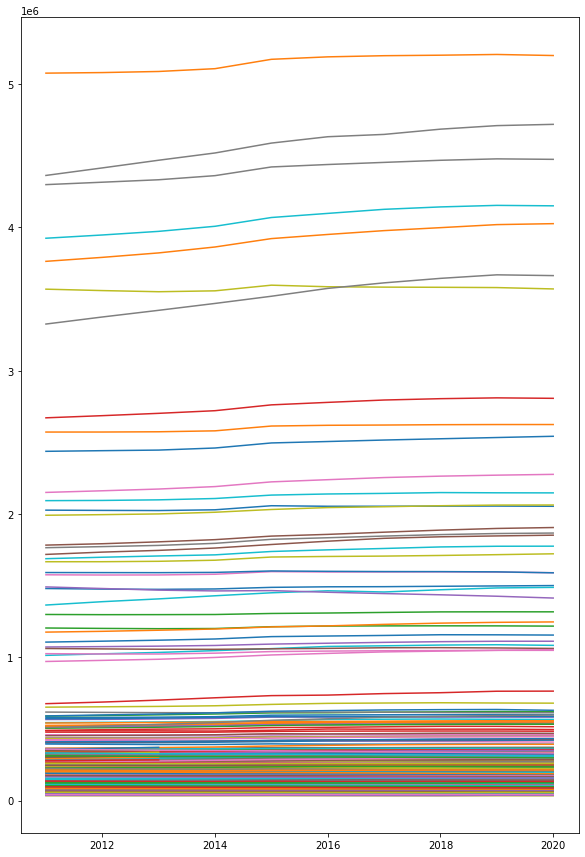

In [ ]:
plt.figure(figsize=(10,15))
for gc in df_stationary['Gemeinde_Code'].unique():
  df = df_stationary[df_stationary['Gemeinde_Code']==gc]
  plt.plot(df['Jahr'], df['Bevoelkerung'], label = gc)

plt.show()

In [ ]:
print(df_combined['Bevoelkerung'].corr(df_combined['Sozialversicherungspflichtig']))
print(df_combined['Bevoelkerung'].corr(df_combined['Arbeitslose']))
print(df_combined['Bevoelkerung'].corr(df_combined['Gestorbene']))
print(df_combined['Bevoelkerung'].corr(df_combined['Geborene']))
print(df_combined['Bevoelkerung'].corr(df_combined['Schutzsuchende']))
print(df_combined['Bevoelkerung'].corr(df_combined['Zuzuege']))
print(df_combined['Bevoelkerung'].corr(df_combined['Fortzuege']))



0.99681303916725
0.9264534841598557
0.9905484238263543
0.994341799828964
0.8797760711229736
0.9757038001550545
0.9765158450070863
